# Importing Libraries

In [1]:
from flask import Flask, render_template, request
import joblib
import numpy as np;
import pandas as pd;
import seaborn as sea;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer;
from sklearn.compose import ColumnTransformer;
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor;
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix;
from sklearn.model_selection import cross_val_score;


# Defining our dataset

In [2]:
Dataset = pd.read_csv('titanic.csv')

# Defining Feature x and Target y 

In [3]:
Dataset['Sex'] = Dataset['Sex'].map({'male':0 , 'female':1})
x = Dataset[['Pclass','Sex','Age','Fare','Cabin']]
y = Dataset['Survived']

# Visualizing the dataset

<Axes: xlabel='Pclass', ylabel='count'>

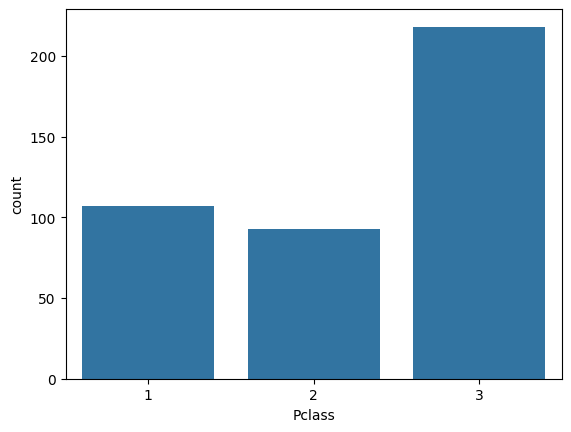

In [4]:
sea.countplot(x = 'Pclass', data=Dataset)

<Axes: xlabel='Sex', ylabel='count'>

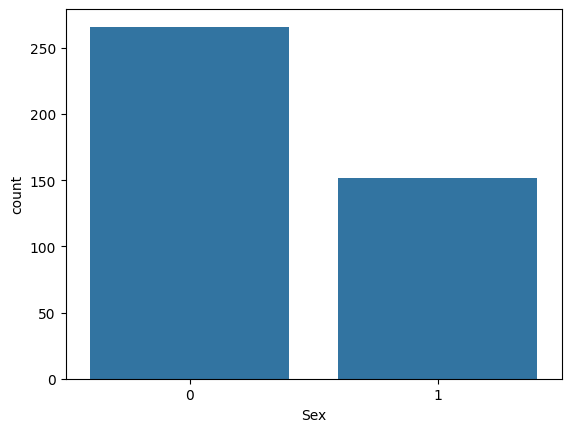

In [5]:
sea.countplot(x = 'Sex', data=Dataset)

<Axes: xlabel='Survived', ylabel='count'>

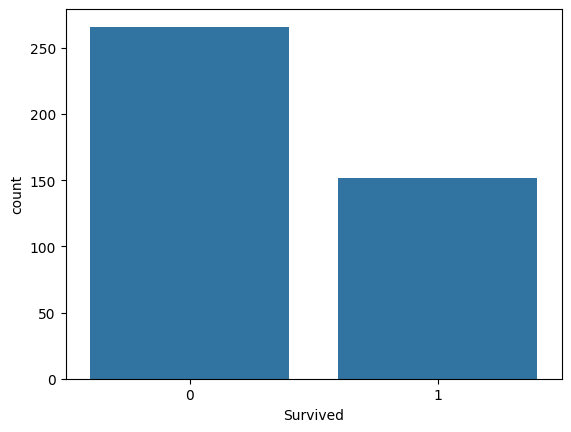

In [6]:
sea.countplot(x = 'Survived', data=Dataset)

<Axes: xlabel='Sex', ylabel='count'>

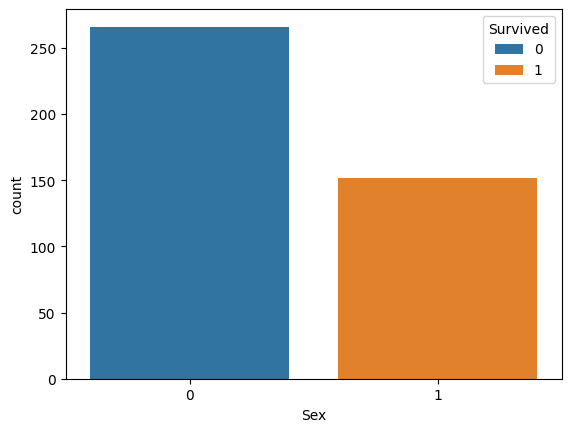

In [7]:
sea.countplot(x = 'Sex', hue='Survived', data=Dataset )

<Axes: xlabel='Pclass', ylabel='count'>

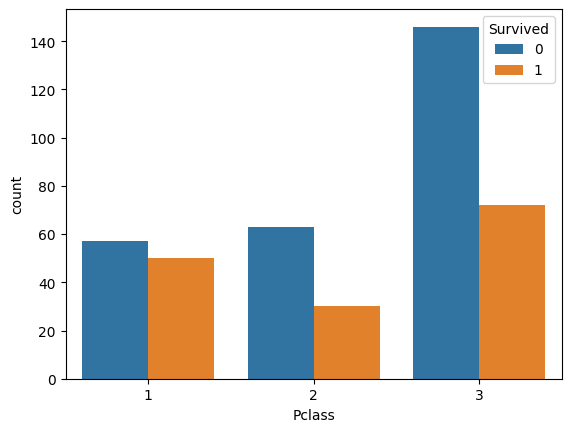

In [8]:
sea.countplot(x = 'Pclass', hue='Survived', data=Dataset )

# Creating Transformer by Pipeline and SimpleImputer to convert non Int or Nan to mean or most frequent way
# Combine transformers using ColumnTransformer

In [9]:
numerical_features = ['Pclass', 'Age', 'Fare']
categorical_features = ['Sex', 'Cabin']

In [10]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

 

# Creating pipeline for the Classifier

In [11]:
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=42))
])

In [12]:
x.dtypes

Pclass      int64
Sex         int64
Age       float64
Fare      float64
Cabin      object
dtype: object

In [13]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Splitting the dataset

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Applying Classifier and testing the accuracy

In [15]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [16]:
cv_scores = cross_val_score(clf, x, y, cv=5, scoring='accuracy')
recall = cross_val_score(clf, x, y, cv=5, scoring='recall')
f1 = cross_val_score(clf, x, y, cv=5, scoring='f1')
roc_auc = cross_val_score(clf, x, y, cv=5, scoring='roc_auc')

In [17]:
cv_scores
recall
f1
roc_auc

array([1., 1., 1., 1., 1.])

In [18]:
f1

array([1., 1., 1., 1., 1.])

In [19]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred ))
print(confusion_matrix(y_test, y_pred ))

Test Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

[[85  0]
 [ 0 41]]


In [20]:
joblib.dump(clf, 'titanic_model.pkl')

['titanic_model.pkl']